In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
import datetime
import operator
%matplotlib inline

In [39]:
# Project Topic/Title: Predicting Covid-19 cases for healthcare systems globally.

# Problem Statement: Covid-19 is a global pandemic that has caused great stress and 
#                    impacted the world in various ways. Most notably, it has placed 
#                    great stress on the healthcare systems worldwide.

# Motivation: There is a need to predict cases as accurately as possible 
#             so that the healthcare systems can better accommodate the 
#             necessary resources for treatment, enabling them to better cope.


In [40]:
confirmed_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
death_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [41]:
confirmed_cases.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,155944,156040,156071,156124,156166,156196,156210,156250,156284,156307
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,181696,181960,182610,183282,183873,184340,184887,185300,185497,186222
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,205822,205903,205990,206069,206160,206270,206358,206452,206566,206649
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,15404,15425,15425,15462,15505,15516,15516,15516,15516,15516
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,63861,63930,64033,64126,64226,64301,64374,64433,64458,64487


In [42]:
death_cases.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7255,7260,7262,7266,7268,7269,7272,7280,7281,7281
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2874,2880,2888,2893,2902,2909,2916,2924,2931,2937
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,5890,5894,5899,5904,5907,5913,5918,5920,5924,5927
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,130,130,130,130,130,130,130,130,130,130
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1697,1701,1702,1703,1705,1707,1708,1710,1713,1713


In [43]:
recovered_cases.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '10/24/21', '10/25/21', '10/26/21', '10/27/21', '10/28/21', '10/29/21',
       '10/30/21', '10/31/21', '11/1/21', '11/2/21'],
      dtype='object', length=655)

In [45]:
confirmed_filtered = confirmed_cases.loc[:, cols[4]:cols[-1]]
confirmed_filtered.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21
0,0,0,0,0,0,0,0,0,0,0,...,155944,156040,156071,156124,156166,156196,156210,156250,156284,156307
1,0,0,0,0,0,0,0,0,0,0,...,181696,181960,182610,183282,183873,184340,184887,185300,185497,186222
2,0,0,0,0,0,0,0,0,0,0,...,205822,205903,205990,206069,206160,206270,206358,206452,206566,206649
3,0,0,0,0,0,0,0,0,0,0,...,15404,15425,15425,15462,15505,15516,15516,15516,15516,15516
4,0,0,0,0,0,0,0,0,0,0,...,63861,63930,64033,64126,64226,64301,64374,64433,64458,64487


In [46]:
singapore_confirmed_filtered = confirmed_cases[confirmed_cases["Country/Region"] == "Singapore"].loc[:, cols[4]:cols[-1]]
singapore_confirmed_filtered

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21
230,0,1,3,3,4,5,7,7,10,13,...,172644,175818,179095,184419,187851,192099,195211,198374,200844,204340


In [47]:
deaths_filtered = death_cases.loc[:, cols[4]:cols[-1]]
deaths_filtered.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21
0,0,0,0,0,0,0,0,0,0,0,...,7255,7260,7262,7266,7268,7269,7272,7280,7281,7281
1,0,0,0,0,0,0,0,0,0,0,...,2874,2880,2888,2893,2902,2909,2916,2924,2931,2937
2,0,0,0,0,0,0,0,0,0,0,...,5890,5894,5899,5904,5907,5913,5918,5920,5924,5927
3,0,0,0,0,0,0,0,0,0,0,...,130,130,130,130,130,130,130,130,130,130
4,0,0,0,0,0,0,0,0,0,0,...,1697,1701,1702,1703,1705,1707,1708,1710,1713,1713


In [48]:
recovered_filtered = recovered_cases.loc[:, cols[4]:cols[-1]]
recovered_filtered.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:

dates = confirmed_filtered.keys()
world_cases = []
singapore_cases = []
total_deaths = [] 
mortality_rate = []
total_recovered = [] 

for i in dates:
    confirmed_sum = confirmed_filtered[i].sum()
    singapore_confirmed_sum = singapore_confirmed_filtered[i].sum()
    death_sum = deaths_filtered[i].sum()
    recovered_sum = recovered_filtered[i].sum()
    world_cases.append(confirmed_sum)
    singapore_cases.append(singapore_confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

In [50]:
confirmed_sum, death_sum, recovered_sum, world_cases, singapore_cases

(247574342,
 5013591,
 0,
 [557,
  655,
  941,
  1434,
  2118,
  2927,
  5578,
  6167,
  8235,
  9927,
  12038,
  16787,
  19887,
  23898,
  27643,
  30805,
  34399,
  37130,
  40161,
  42769,
  44811,
  45229,
  60381,
  66909,
  69052,
  71235,
  73270,
  75152,
  75652,
  76212,
  76841,
  78602,
  78982,
  79550,
  80404,
  81381,
  82740,
  84128,
  86022,
  88400,
  90379,
  92980,
  95282,
  98100,
  102016,
  106113,
  110051,
  114230,
  119055,
  126717,
  132519,
  146875,
  157974,
  169251,
  184036,
  200039,
  219595,
  246703,
  277579,
  309721,
  344828,
  387489,
  428574,
  479663,
  542525,
  607435,
  677100,
  734000,
  799279,
  876098,
  959098,
  1042125,
  1126354,
  1185448,
  1256304,
  1330214,
  1399820,
  1483141,
  1570148,
  1655435,
  1729825,
  1849397,
  1920450,
  2004357,
  2082578,
  2178264,
  2266302,
  2343474,
  2420249,
  2495798,
  2571854,
  2653236,
  2737234,
  2821349,
  2903700,
  2975267,
  3045514,
  3121393,
  3198418,
  3281836,
  

In [51]:

days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
singapore_cases = np.array(singapore_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

days_since_1_22

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [52]:
world_cases

array([[      557],
       [      655],
       [      941],
       [     1434],
       [     2118],
       [     2927],
       [     5578],
       [     6167],
       [     8235],
       [     9927],
       [    12038],
       [    16787],
       [    19887],
       [    23898],
       [    27643],
       [    30805],
       [    34399],
       [    37130],
       [    40161],
       [    42769],
       [    44811],
       [    45229],
       [    60381],
       [    66909],
       [    69052],
       [    71235],
       [    73270],
       [    75152],
       [    75652],
       [    76212],
       [    76841],
       [    78602],
       [    78982],
       [    79550],
       [    80404],
       [    81381],
       [    82740],
       [    84128],
       [    86022],
       [    88400],
       [    90379],
       [    92980],
       [    95282],
       [    98100],
       [   102016],
       [   106113],
       [   110051],
       [   114230],
       [   119055],
       [   126717],


In [53]:
singapore_cases

array([[     0],
       [     1],
       [     3],
       [     3],
       [     4],
       [     5],
       [     7],
       [     7],
       [    10],
       [    13],
       [    16],
       [    18],
       [    18],
       [    24],
       [    28],
       [    28],
       [    30],
       [    33],
       [    40],
       [    45],
       [    47],
       [    50],
       [    58],
       [    67],
       [    72],
       [    75],
       [    77],
       [    81],
       [    84],
       [    84],
       [    85],
       [    85],
       [    89],
       [    89],
       [    91],
       [    93],
       [    93],
       [    93],
       [   102],
       [   106],
       [   108],
       [   110],
       [   110],
       [   117],
       [   130],
       [   138],
       [   150],
       [   150],
       [   160],
       [   178],
       [   178],
       [   200],
       [   212],
       [   226],
       [   243],
       [   266],
       [   313],
       [   345],
       [   385

In [54]:
days_in_future = 10
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forecast[:-10]

future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [55]:
# Convert all the integers into datetime for better visualization

start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [56]:
latest_confirmed = confirmed_filtered[dates[-1]]
latest_deaths = deaths_filtered[dates[-1]]
latest_recoveries = recovered_filtered[dates[-1]]

latest_confirmed, latest_deaths, latest_recoveries

(0      156307
 1      186222
 2      206649
 3       15516
 4       64487
         ...  
 275    932357
 276    454172
 277      9806
 278    209760
 279    133047
 Name: 11/2/21, Length: 280, dtype: int64,
 0       7281
 1       2937
 2       5927
 3        130
 4       1713
        ...  
 275    22205
 276     4689
 277     1894
 278     3661
 279     4683
 Name: 11/2/21, Length: 280, dtype: int64,
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 260    0
 261    0
 262    0
 263    0
 264    0
 Name: 11/2/21, Length: 265, dtype: int64)

In [57]:
unique_countries = list(confirmed_cases['Country/Region'].unique())
unique_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

In [58]:
# The next line of code will basically calculate the total number of confirmed cases by each country

country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_cases['Country/Region']==i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_confirmed[confirmed_cases['Country/Region']==unique_countries[i]].sum()

In [59]:
# number of cases per country/region

print('Confirmed Cases by Countries/Regions:')
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}: {country_confirmed_cases[i]} cases')

Confirmed Cases by Countries/Regions:
US: 46169012 cases
India: 34308140 cases
Brazil: 21821124 cases
United Kingdom: 9174153 cases
Russia: 8455232 cases
Turkey: 8091432 cases
France: 7272516 cases
Iran: 5944599 cases
Argentina: 5291285 cases
Spain: 5016968 cases
Colombia: 5005402 cases
Italy: 4777614 cases
Germany: 4649964 cases
Indonesia: 4245373 cases
Mexico: 3808205 cases
Ukraine: 3093661 cases
Poland: 3034668 cases
South Africa: 2922391 cases
Philippines: 2792656 cases
Malaysia: 2481339 cases
Peru: 2202189 cases
Netherlands: 2187466 cases
Iraq: 2057716 cases
Thailand: 1935442 cases
Czechia: 1773291 cases
Canada: 1726767 cases
Japan: 1723863 cases
Chile: 1698127 cases
Romania: 1666097 cases
Bangladesh: 1569982 cases
Belgium: 1360650 cases
Israel: 1331597 cases
Pakistan: 1274578 cases
Sweden: 1174273 cases
Serbia: 1155756 cases
Portugal: 1091592 cases
Kazakhstan: 1022944 cases
Cuba: 953183 cases
Morocco: 946543 cases
Vietnam: 932357 cases
Switzerland: 879051 cases
Hungary: 876497 ca

In [60]:
# Find the list of unique provinces

# remove NaN
# unique_provinces =  list(confirmed_cases['Province/State'].unique())[1:]
unique_provinces =  list(confirmed_cases['Province/State'].unique())
unique_provinces

[nan,
 'Australian Capital Territory',
 'New South Wales',
 'Northern Territory',
 'Queensland',
 'South Australia',
 'Tasmania',
 'Victoria',
 'Western Australia',
 'Alberta',
 'British Columbia',
 'Diamond Princess',
 'Grand Princess',
 'Manitoba',
 'New Brunswick',
 'Newfoundland and Labrador',
 'Northwest Territories',
 'Nova Scotia',
 'Nunavut',
 'Ontario',
 'Prince Edward Island',
 'Quebec',
 'Repatriated Travellers',
 'Saskatchewan',
 'Yukon',
 'Anhui',
 'Beijing',
 'Chongqing',
 'Fujian',
 'Gansu',
 'Guangdong',
 'Guangxi',
 'Guizhou',
 'Hainan',
 'Hebei',
 'Heilongjiang',
 'Henan',
 'Hong Kong',
 'Hubei',
 'Hunan',
 'Inner Mongolia',
 'Jiangsu',
 'Jiangxi',
 'Jilin',
 'Liaoning',
 'Macau',
 'Ningxia',
 'Qinghai',
 'Shaanxi',
 'Shandong',
 'Shanghai',
 'Shanxi',
 'Sichuan',
 'Tianjin',
 'Tibet',
 'Unknown',
 'Xinjiang',
 'Yunnan',
 'Zhejiang',
 'Faroe Islands',
 'Greenland',
 'French Guiana',
 'French Polynesia',
 'Guadeloupe',
 'Martinique',
 'Mayotte',
 'New Caledonia',
 'Reu

In [61]:
# Finding the number of confirmed cases per province, state or city

province_confirmed_cases = []
no_cases = [] 
for i in unique_provinces:
    cases = latest_confirmed[confirmed_cases['Province/State']==i].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
 
for case in no_cases:
    unique_provinces.remove(case)

In [62]:
# number of cases per province/state/city

for i in range(len(unique_provinces)):
    print(f'{unique_provinces[i]}: {province_confirmed_cases[i]} cases')

Australian Capital Territory: 1803 cases
New South Wales: 75766 cases
Northern Territory: 225 cases
Queensland: 2089 cases
South Australia: 918 cases
Tasmania: 237 cases
Victoria: 92126 cases
Western Australia: 1112 cases
Alberta: 324514 cases
British Columbia: 204914 cases
Grand Princess: 13 cases
Manitoba: 63809 cases
New Brunswick: 6516 cases
Newfoundland and Labrador: 1994 cases
Northwest Territories: 1880 cases
Nova Scotia: 7424 cases
Nunavut: 674 cases
Ontario: 608905 cases
Prince Edward Island: 319 cases
Quebec: 426946 cases
Repatriated Travellers: 13 cases
Saskatchewan: 77902 cases
Yukon: 944 cases
Anhui: 1008 cases
Beijing: 1173 cases
Chongqing: 608 cases
Fujian: 1308 cases
Gansu: 327 cases
Guangdong: 3230 cases
Guangxi: 341 cases
Guizhou: 158 cases
Hainan: 190 cases
Hebei: 1352 cases
Heilongjiang: 1857 cases
Henan: 1560 cases
Hong Kong: 12349 cases
Hubei: 68309 cases
Hunan: 1197 cases
Inner Mongolia: 606 cases
Jiangsu: 1600 cases
Jiangxi: 943 cases
Jilin: 577 cases
Liaoning: 

In [63]:
# handling nan values if there is any

nan_indices = [] 

for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)

unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)

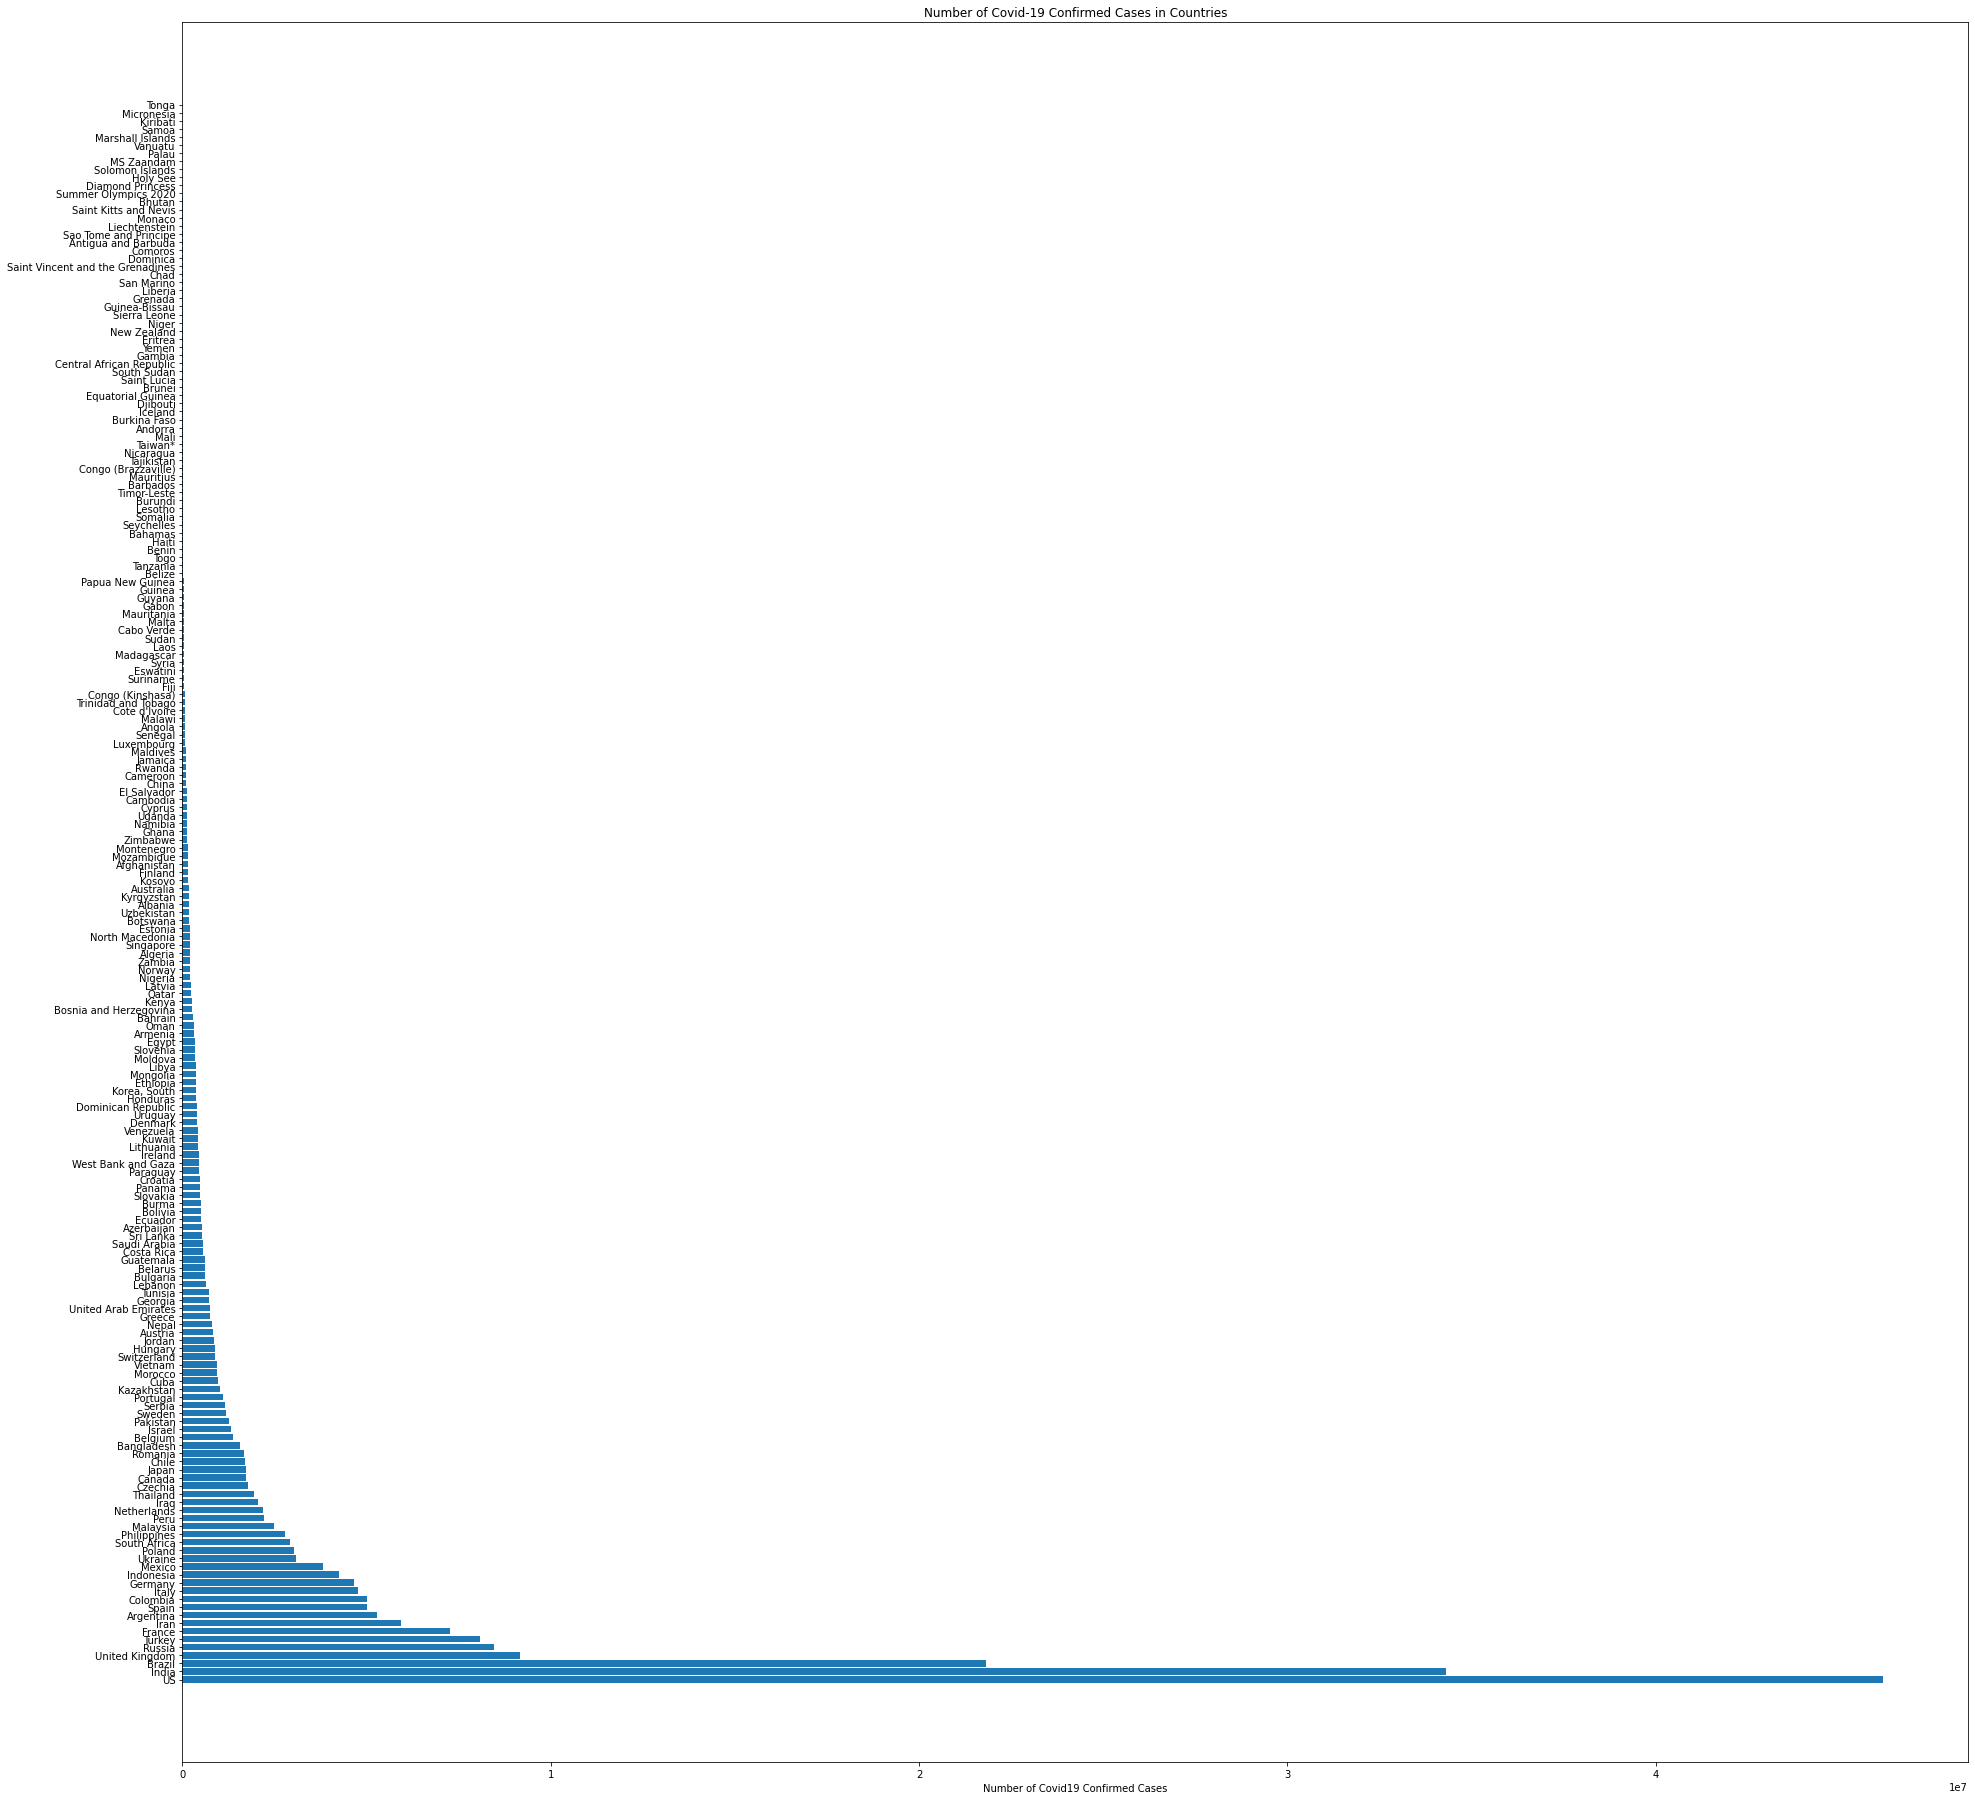

In [64]:
# Plot a bar graph to see the total confirmed cases across different countries

plt.figure(figsize=(32, 32))
plt.barh(unique_countries, country_confirmed_cases)
plt.title('Number of Covid-19 Confirmed Cases in Countries')
plt.xlabel('Number of Covid19 Confirmed Cases')
plt.show()

In [65]:
# Only show 10 countries with the most confirmed cases, the rest are grouped into the category named others

visual_unique_countries = [] 
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])
for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])

visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

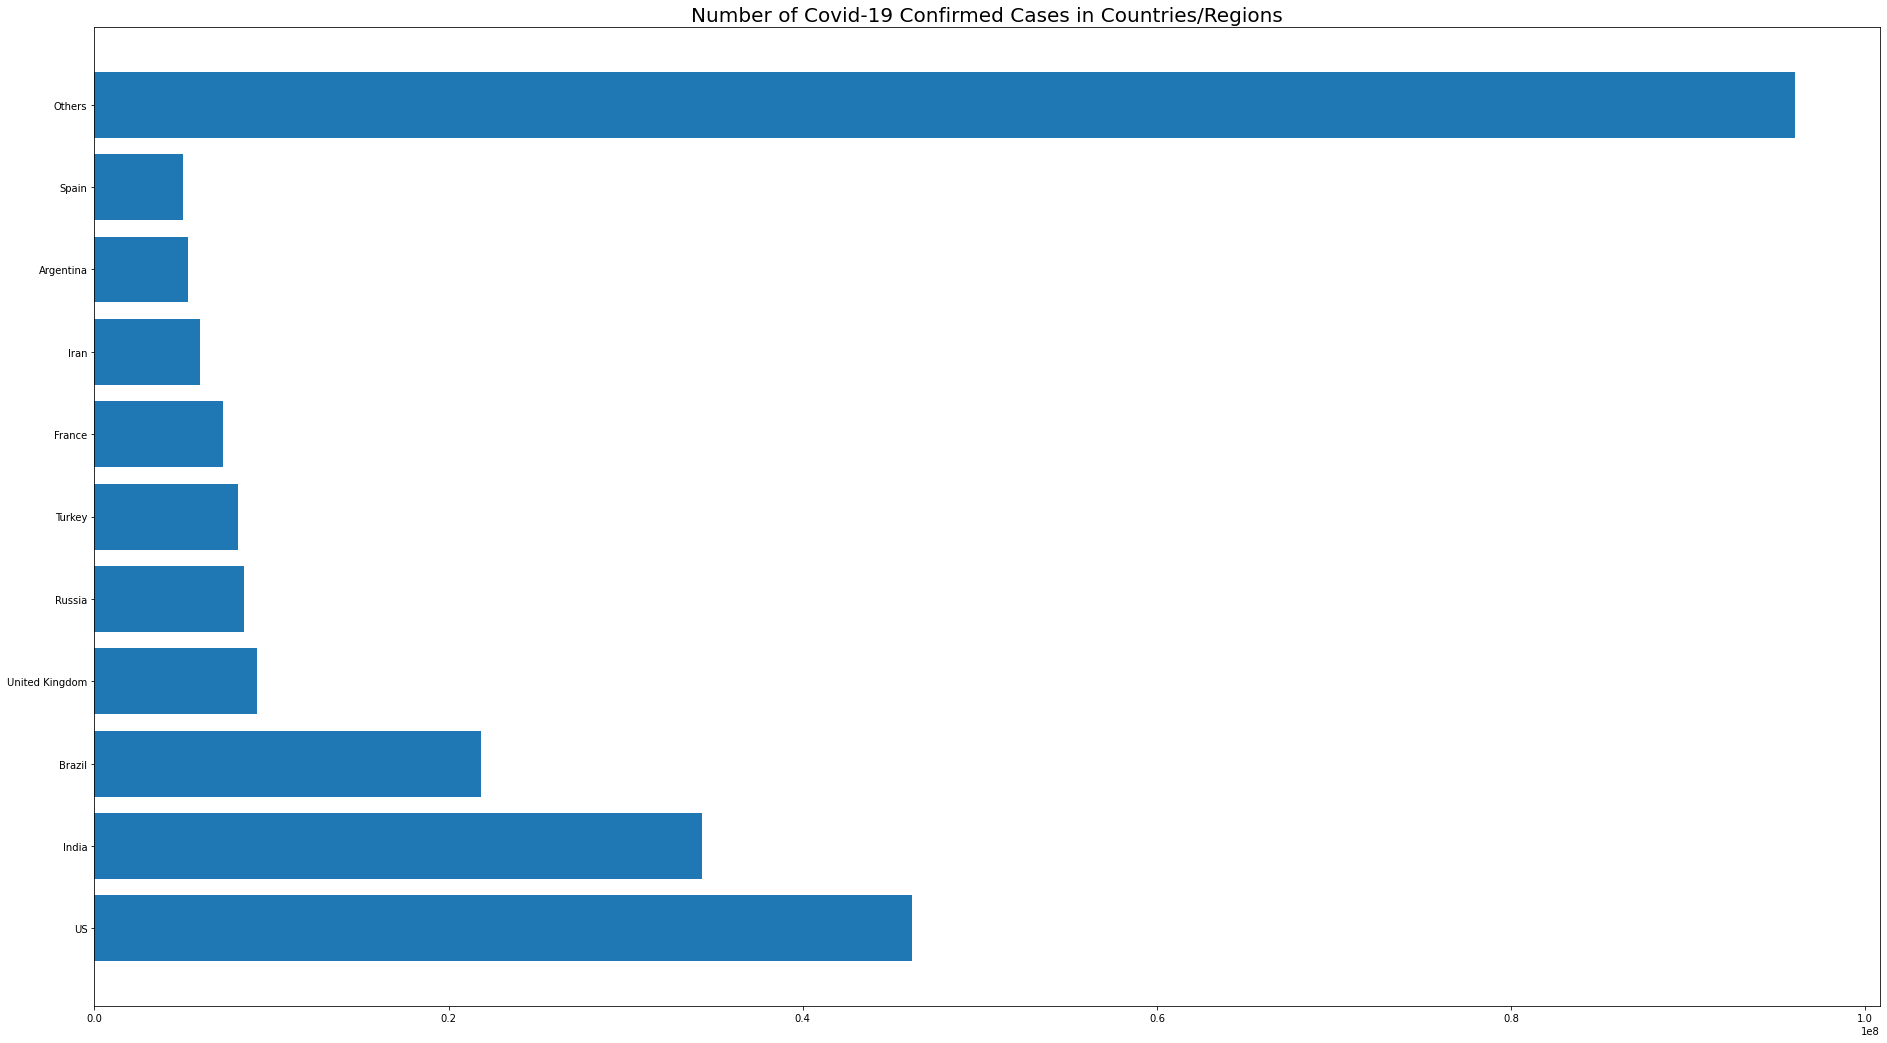

In [66]:
# Visualize the 10 countries

plt.figure(figsize=(32, 18))
plt.barh(visual_unique_countries, visual_confirmed_cases)
plt.title('Number of Covid-19 Confirmed Cases in Countries/Regions', size=20)
plt.show()

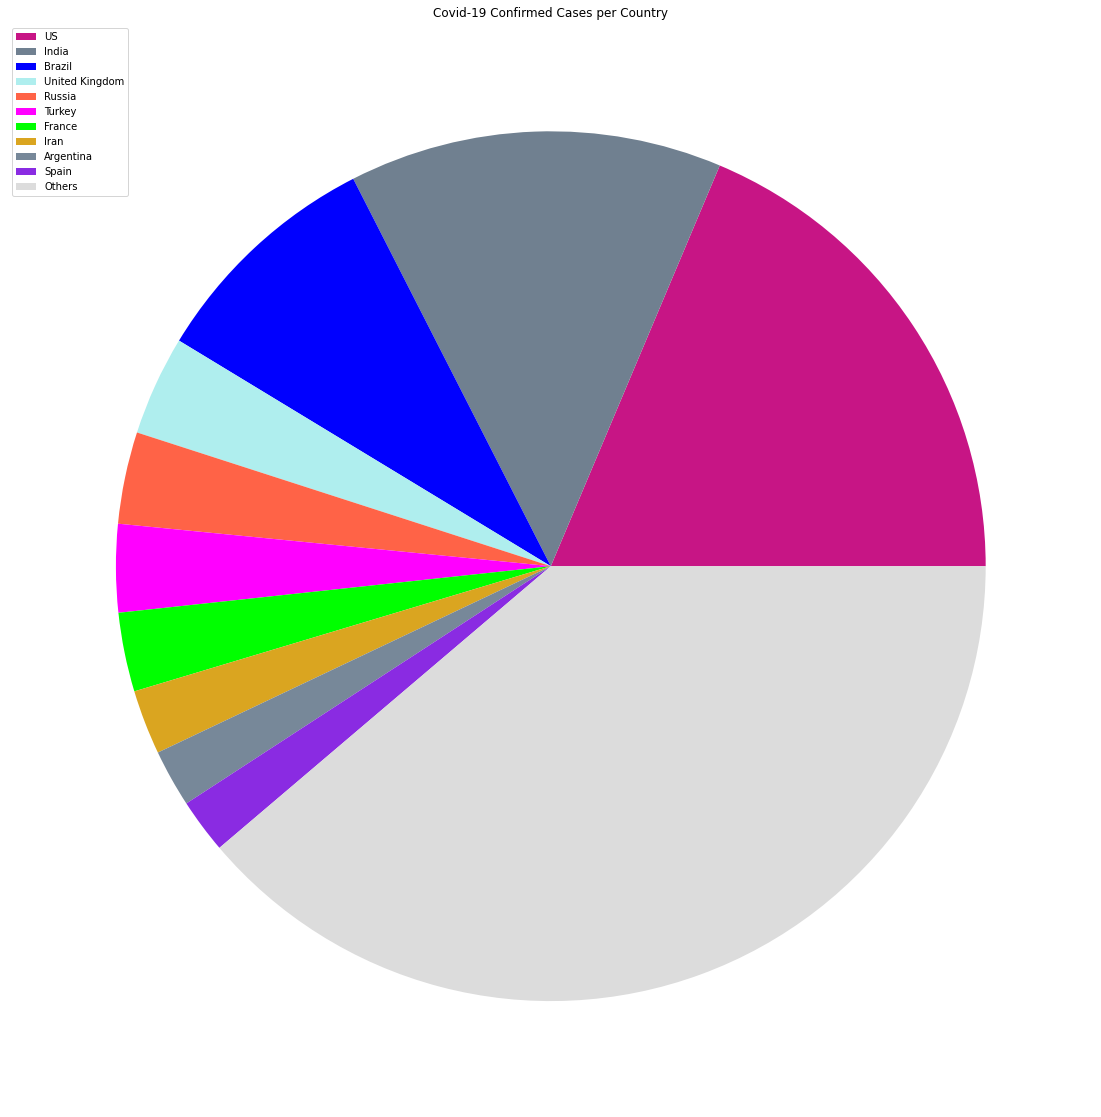

In [67]:
# Create a pie chart to see the total confirmed cases in 10 different countries

c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('Covid-19 Confirmed Cases per Country')
plt.pie(visual_confirmed_cases, colors=c)
plt.legend(visual_unique_countries, loc='best')
plt.show()

In [68]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

**Random Forest**

In [69]:
def model_and_accuracy(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

    #put a trail loop inside 
    for i in range(4):
        
        n_estimators = 6 ** i

        rf_model = RandomForestRegressor(
            n_estimators = n_estimators,
            bootstrap = True,
            n_jobs = -1,
            max_depth=3
        )

        rf_model.fit(X_train, y_train)
        y_pred = rf_model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test,y_pred) 
        train_adjusted_r2 = 1 - (1-rf_model.score(X_train, y_train)) * (len(world_cases)-1)/(len(world_cases)-days_since_1_22.shape[1]-1)
        test_adjusted_r2 = 1 - (1-rf_model.score(X_test, y_test)) * (len(world_cases)-1)/(len(world_cases)-days_since_1_22.shape[1]-1)
        rsq = r2_score(y_test,y_pred)
        print(f'Estimators: {n_estimators}')       
        print('MAE:', mae)
        print('MSE:', mse)
        print('RMSE:', rmse)
        print('R-squared score for train:', rf_model.score(X_train, y_train))
        print('Adjusted R-squared score for train:', train_adjusted_r2)
        print('R-squared score for test:', rf_model.score(X_test, y_test))
        print('Adjusted R-squared score for test:', test_adjusted_r2)
        print('Cross Validation Score:', round(np.mean(cross_val_score(rf_model, days_since_1_22, world_cases.ravel(), cv=5)), 4))
        print('--------------------------------------')
        print()

def get_most_important_features(X, y, n_estimators):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =101)

    rf_model = RandomForestRegressor(
        n_estimators = n_estimators,
        bootstrap = True,
        n_jobs = -1
    )

    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)

    #plt.plot(pd.DataFrame(rf_model.feature_importances_, index=X.columns, columns=['score']).sort_values(by='score', ascending=False))

In [70]:
# X = cfm_year_df.drop(columns=['y_year'])
# y = cfm_year_df['y_year']

model_and_accuracy(days_since_1_22, world_cases.ravel())

Estimators: 1
MAE: 7177173.651914932
MSE: 75177713789571.47
RMSE: 8670508.277463984
R-squared score for train: 0.9895168495989084
Adjusted R-squared score for train: 0.9895006968247927
R-squared score for test: 0.9875121281911623
Adjusted R-squared score for test: 0.9874928864780516
Cross Validation Score: -21.5166
--------------------------------------

Estimators: 6
MAE: 5313168.861577754
MSE: 42242798429414.49
RMSE: 6499446.009423764
R-squared score for train: 0.9938561690629115
Adjusted R-squared score for train: 0.9938467024512981
R-squared score for test: 0.9929829915670264
Adjusted R-squared score for test: 0.9929721795355426
Cross Validation Score: -12.6758
--------------------------------------

Estimators: 36
MAE: 5145341.603039885
MSE: 37964705239503.95
RMSE: 6161550.554811991
R-squared score for train: 0.9945149461002263
Adjusted R-squared score for train: 0.9945064945533854
R-squared score for test: 0.9936936314182382
Adjusted R-squared score for test: 0.9936839143634126
C

Adjust hyper-parameters to find the most generalised model: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

Finding Best Params

In [72]:
X_train, X_test, y_train, y_test = train_test_split(days_since_1_22, world_cases.ravel(), test_size = 0.2, random_state = 101)

rf_find_best = RandomForestRegressor(
            n_estimators = 1,
            bootstrap = True,
            n_jobs = -1,
            max_depth=3
        )

distributions = {
    "n_estimators":[x for x in range(1,31,2)],
    "max_depth":[x for x in range(1,10)]
}

clf = RandomizedSearchCV(rf_find_best,distributions,random_state=101)
search = clf.fit(X_train, y_train)
search.best_params_

{'n_estimators': 15, 'max_depth': 9}

In [73]:
rf_best = RandomForestRegressor(
            n_estimators = 15,
            bootstrap = True,
            n_jobs = -1,
            max_depth=9
        )
rf_best.fit(X_train,y_train)

y_pred = rf_best.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred) 
train_adjusted_r2 = 1 - (1-rf_best.score(X_train, y_train)) * (len(world_cases)-1)/(len(world_cases)-days_since_1_22.shape[1]-1)
test_adjusted_r2 = 1 - (1-rf_best.score(X_test, y_test)) * (len(world_cases)-1)/(len(world_cases)-days_since_1_22.shape[1]-1)
rsq = r2_score(y_test,y_pred)
print(f'Estimators: 15')
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R-squared score for train:', rf_best.score(X_train, y_train))
print('Adjusted R-squared score for train:', train_adjusted_r2)
print('R-squared score for test:', rf_best.score(X_test, y_test))
print('Adjusted R-squared score for test:', test_adjusted_r2)
print('Cross Validation Score:', round(np.mean(cross_val_score(rf_best, days_since_1_22, world_cases.ravel(), cv=5)), 4))


Estimators: 15
MAE: 227395.68813030244
MSE: 98378465031.88123
RMSE: 313653.4154634399
R-squared score for train: 0.9999965840445553
Adjusted R-squared score for train: 0.9999965787811417
R-squared score for test: 0.9999836582199945
Adjusted R-squared score for test: 0.9999836330400561
Cross Validation Score: -1.6251


In [74]:
print('Random Forest future predictions:')
set(zip(future_forecast_dates[-10:], y_pred[-10:]))

Random Forest future predictions:


{('11/03/2021', 193370.4050793651),
 ('11/04/2021', 36415756.733333334),
 ('11/05/2021', 2113552.94),
 ('11/06/2021', 164386241.66666666),
 ('11/07/2021', 98835143.26666667),
 ('11/08/2021', 1909741.2666666666),
 ('11/09/2021', 107925.10717145576),
 ('11/10/2021', 165443.00322751323),
 ('11/11/2021', 4780633.366666666),
 ('11/12/2021', 73464186.33333333)}